## Final Project: Prediction of Corporate Finance Incidents

In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read data
df = pd.read_csv("dataset.csv")

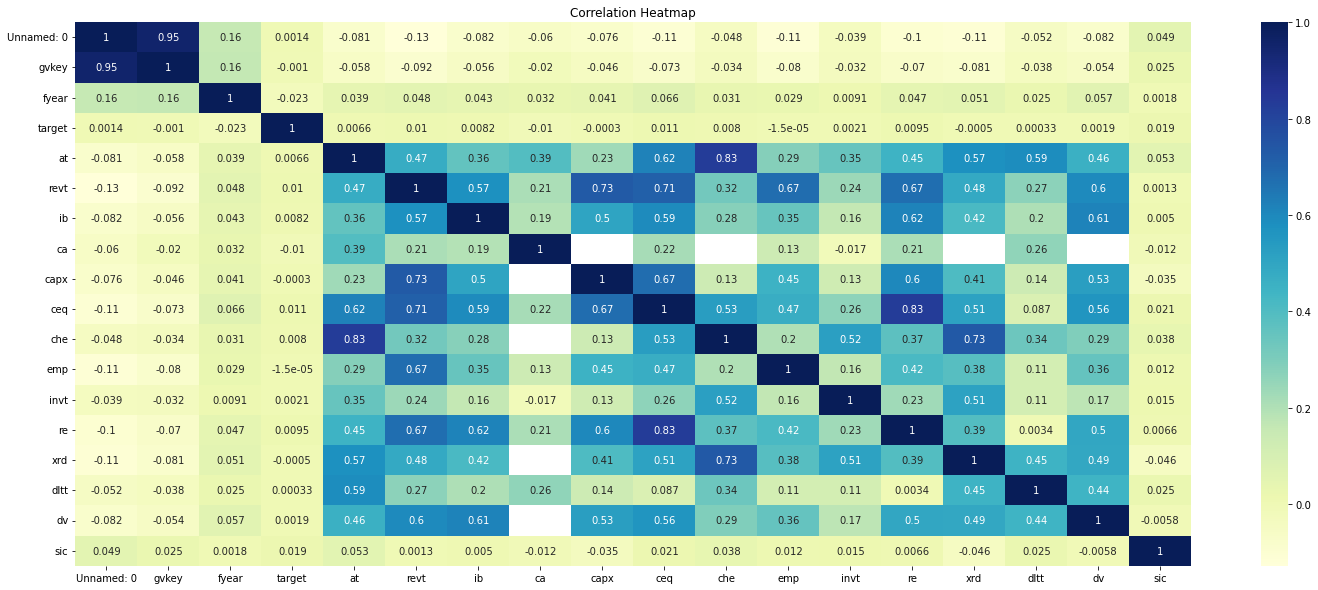

In [3]:
# Correlation heat map
plt.figure(figsize=(25,10))
plt.title("Correlation Heatmap")
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Based on the correlation map, sic, emp, capx have values of nearly 0 with our target, they will be dropped. Unnamed: 0, ca, and xrd have half of data missing, so they will be dropped.

In [4]:
# Info of NaN values
print("Number of NaN value in each feature:")
df.isna().sum()

Number of NaN value in each feature:


Unnamed: 0         0
gvkey              0
fyear              0
target             0
at             34635
revt           35677
ib             35660
ca            211399
capx           63184
ceq            35063
che            57076
emp            63859
invt           53353
re             40548
xrd           150287
dltt           35036
dv             65058
sic                3
dtype: int64

In [5]:
# Drop the variables
df.drop([ "Unnamed: 0", "ca",'xrd', 'sic', 'emp', 'capx'],1, inplace=True)

### Balancing the dataset: Choose equal number of data that are either target = 0 or 1 because they are too many targets that are 0.
### With all the missing values in each row, and different ranges for columns, all rows with missing value(s) will be dropped.

In [6]:
# select rows with target = 0 and drop Nan
df_1 = df.query('target == 0')
df_1 = df_1.dropna(axis=0)

# select rows with target = 1 and drop Nan
df_2 = df.query('target == 1')
df_2 = df_2.dropna(axis=0)
df_1 = df_1.iloc[:len(df_2),:]

# concatenating two datasets
con = [df_1, df_2]
updated_df = pd.concat(con)

In [7]:
# define target values and features
target_column = updated_df['target']
predictors = list(set(list(updated_df.columns))-set(target_column))

# set to variables
X = updated_df[predictors].values
y = target_column.values

# 1. Non-sequential Models

## 1.1 Logistic Regression

f1 score of Logistic Regression model: 0.97 or 96.80%


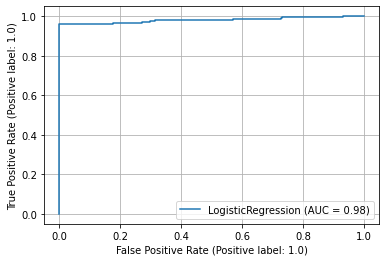

In [8]:
# split dataset into 80% training and 20% test
X_train_LG, X_test_LG, y_train_LG, y_test_LG = train_test_split(X, y, test_size=0.2, random_state=40)

# initialize logistic model and train the model
LG = LogisticRegression().fit(X_train_LG, y_train_LG)
LG_predict = LG.predict(X_test_LG)

# f1 score of the model
f_1_LG = f1_score(LG_predict, y_test_LG)
f_1_LG_percent = 100 * f1_score(LG_predict, y_test_LG)
print('f1 score of Logistic Regression model: {:.2f} or {:.2f}%'.format(f_1_LG, f_1_LG_percent))

# plot ROC
plot_roc_curve(LG, X_test_LG, y_test_LG) 
plt.grid()
plt.show()

## 1.2 Stochastic Gradient Descent Classifier

f1 score of SGD Classifier model with η 0.0: 0.76 or 76.36%


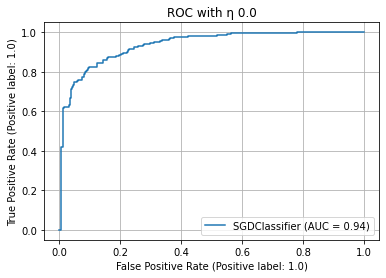

f1 score of SGD Classifier model with η 0.2: 0.94 or 94.32%


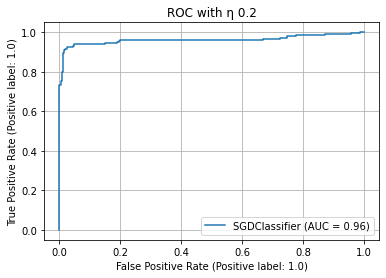

f1 score of SGD Classifier model with η 0.4: 0.94 or 93.51%


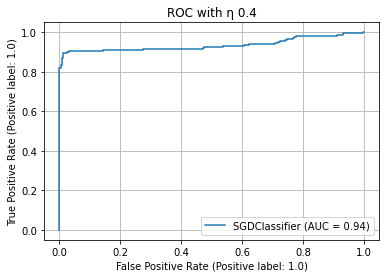

f1 score of SGD Classifier model with η 0.6: 0.93 or 93.36%


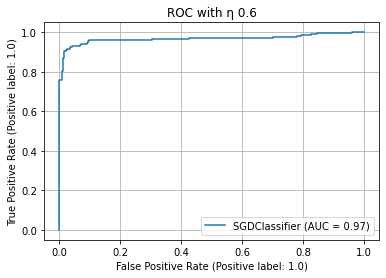

f1 score of SGD Classifier model with η 0.8: 0.93 or 93.05%


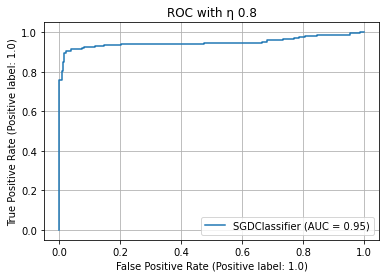

f1 score of SGD Classifier model with η 1.0: 0.94 or 93.51%


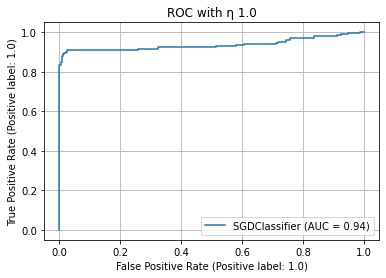

In [9]:
# split dataset into 80% training and 20% test
X_train_SGD, X_test_SGD, y_train_SGD, y_test_SGD = train_test_split(X, y, test_size=0.2, random_state=40)

# SGD Classifier model with different eta value (0,1)
for i in np.arange(0.0, 1.1, 0.2):

    # initialize SGD model
    SGD = SGDClassifier(learning_rate='optimal', eta0=i, max_iter=1000, tol=1e-3).fit(X_train_SGD, y_train_SGD)
    SGD_predict = SGD.predict(X_test_SGD)
    
    # if f1 score is not zero, then plot ROC
    if f1_score(SGD_predict, y_test_SGD) != 0.0:
        
        # f1 score of each model
        f_1_SGD = f1_score(SGD_predict, y_test_SGD)
        f_1_SGD_Percent = 100 * f1_score(SGD_predict, y_test_SGD)
        print('f1 score of SGD Classifier model with \u03B7 {:.1f}: {:.2f} or {:.2f}%'.format(i, f_1_SGD, f_1_SGD_Percent))

        # plot ROC
        plot_roc_curve(SGD, X_test_SGD, y_test_SGD)
        plt.title('ROC with \u03B7 {:.1f}'.format(i)) 
        plt.grid()
        plt.show()
        print('============================================================')
    else:
        pass

## 1.3 Support Vector Machine

f1 score of SVM model with linear method: 0.95 or 94.67%


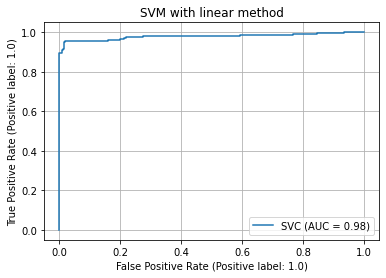

f1 score of SVM model with poly method: 0.76 or 76.21%


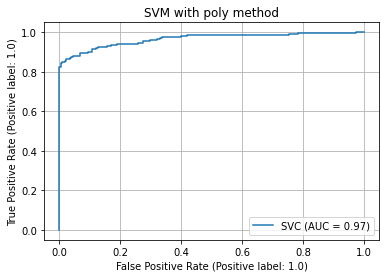

f1 score of SVM model with rbf method: 0.91 or 91.48%


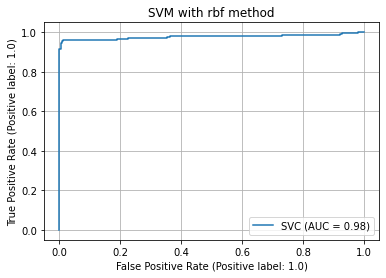

f1 score of SVM model with sigmoid method: 0.79 or 79.35%


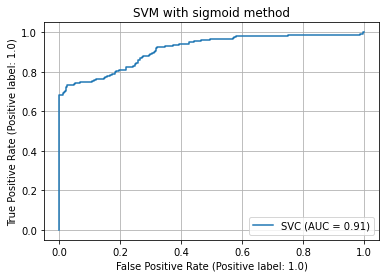

In [10]:
# split dataset into 80% training and 20% test
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X, y, test_size=0.2, random_state=40)
methods = ['linear', 'poly', 'rbf', 'sigmoid']

# SVM model with different methods : linear, poly, rbf, sigmoid, precomputed
for method in methods:

    # initialize SVM model
    SVM = SVC(kernel=method).fit(X_train_SVM, y_train_SVM)
    SVM_predict = SVM.predict(X_test_SVM)

    # if f1 score is not zero, then plot ROC
    if f1_score(SVM_predict, y_test_SVM) != 0.0:
        
        # f1 score of each model
        f_1_SVM = f1_score(SVM_predict, y_test_SVM)
        f_1_SVM_percent = 100 * f1_score(SVM_predict, y_test_SVM)
        print('f1 score of SVM model with {} method: {:.2f} or {:.2f}%'.format(method, f_1_SVM, f_1_SVM_percent))

        # plot ROC
        plot_roc_curve(SVM, X_test_SVM, y_test_SVM)
        plt.title('SVM with {} method'.format(method))
        plt.grid()
        plt.show()
        print('============================================================')
    else:
        pass


# 2. Sequential Models

## 2.1 Long Short-Term Memory (LSTM) - Erick and Sal

In [11]:
x_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)

y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)

y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [12]:
input_dim = 12
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [13]:
class LSTM(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [14]:
model = LSTM(
    input_dim=input_dim, 
    hidden_dim=hidden_dim, 
    output_dim=output_dim, 
    num_layers=num_layers
)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
hist = np.zeros(num_epochs)
start_time = time.time()

for t in range(num_epochs):
    y_train_pred = model(x_train)
    
    loss = criterion(y_train_pred, y_train_lstm)
    print(f"Epoch {t + 1}, MSE {loss.item()}")
    hist[t] = loss.item()
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time() - start_time
print(f"LSTM Training time: {training_time}")

RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

## 2.2 Gated Recurrent Units (GRU) - Matt

In [ ]:
class GRU(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.gru(x)
        return out

In [ ]:
model = GRU(
    input_dim=input_dim, 
    hidden_dim=hidden_dim, 
    output_dim=output_dim, 
    num_layers=num_layers
)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
hist = np.zeros(num_epochs)
start_time = time.time()

for t in range(num_epochs):
    y_train_pred = model(x_train)
    
    loss = criterion(y_train_pred, y_train_gru)
    print(f"Epoch {t + 1}, MSE {loss.item()}")
    hist[t] = loss.item()
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time() - start_time
print(f"GRU Training time: {training_time}")

RuntimeError: input.size(-1) must be equal to input_size. Expected 12, got 1